In [9]:
#pip install gensim

**NLP**:

Natural language processing is the processing of languages used in the system that exists in the library of nltk where this is processed to cut, extract and transform to new data so that we get good insights into it. It uses only the languages that exist in the library because NLP-related things exist there itself so it cannot understand the things beyond what is present in it.

**Problem statement:Perform NLP – Topic Modelling and Text summarization by following all the steps.**

Business Objectives: Perform Topic Modelling on the tweets.

Business Constraints: None


Steps:

Tokenize each tweet

Remove stop words.

punctuation.

lowercase all words.

Remove any remaining special characters.

Lemmatize text.

Construct a dictionary to create the word cloud.

In [5]:

# we are only interested in text column so we will use it only

import pandas as pd

tweets = pd.read_csv(r"D:\DataScience\Class\Assignments\NLP Text mining\tweets.csv")

tweets.head(10)


### Data Cleaning

# let us import the regular expression library re

import re

# let us now define some characters that have to be cleaned

HANDLE = '@\w+'

LINK = 'https?://t\.co/\w+'

SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'

# defining funtion to clean our text tweets

def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

# applying the clean function to text column and saving it back

tweets['Text'] = tweets.Tweets.apply(clean)

tweets.head(10)




,Tweets,Text
0,Grassroots supporters made it possible for us ...,Grassroots supporters made it possible for us ...
1,"Before we took office, the economy added back ...","Before we took office, the economy added back ..."
2,"To put it simply, America's coming back. https...","To put it simply, America's coming back."
3,This is our moment to rebuild an economy from ...,This is our moment to rebuild an economy from ...
4,The Biden economic plan is working. https://t....,The Biden economic plan is working.
5,Enjoyed meeting with Maria and Dreamers this m...,Enjoyed meeting with Maria and Dreamers this m...
6,"Across the country, we have failed to properly...","Across the country, we have failed to properly..."
7,"After meeting with experts and scientists, our...","After meeting with experts and scientists, our..."
8,The American Rescue Plan is helping get us out...,The American Rescue Plan is helping get us out...
9,"More than 20,000 pharmacies coast to coast are...","More than 20,000 pharmacies coast to coast are..."


We have removed or clean the data from unwanted words like @,%,&, virgin america etc.. 

After that we will use Gensim’s Dictionary constructor to give each word in the tweet corpus a unique integer identifier.

In [11]:
from gensim.parsing.preprocessing import preprocess_string

# making each observation as list of words present in that tweet

tweets = tweets.Text.apply(preprocess_string).tolist()

from gensim import corpora

import gensim

# making a Dictionary object from gensim library and using it creating corpus

dictionary = corpora.dictionary.Dictionary(tweets)

corpus = [dictionary.doc2bow(text) for text in tweets]

# creating LdaModel class object using corpus dataset


NUM_TOPICS = 5

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)

ldamodel.print_topics(num_words=5)


from gensim.models.coherencemodel import CoherenceModel


def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()


def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(tweets, dictionary, ldamodel)
        yield coherence




Fitting an LDA model in Gensim is quite simple. As a starting point, we have fit a model with 10 topics to 16 topics and now we calculate coherence scores from 10 topics to 16 topics using the function we defined above.


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics


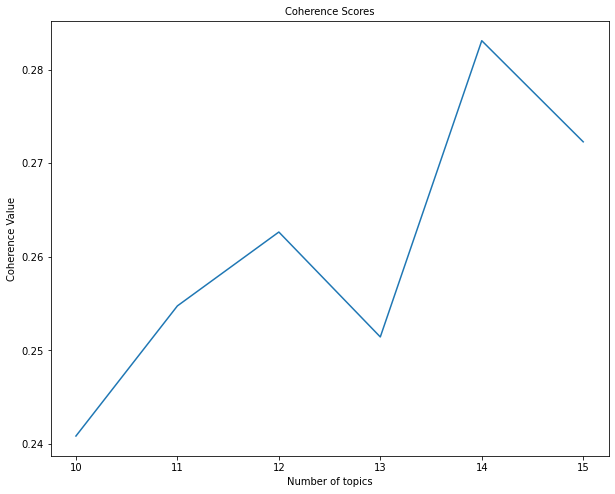

In [13]:

min_topics, max_topics = 10,16

coherence_scores = list(get_coherence_values(min_topics, max_topics))



# now we have to visulaize our results for which we import matplotlib 

import matplotlib.pyplot as plt

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))


plt.plot(x, coherence_scores)


plt.xlabel('Number of topics')


plt.ylabel('Coherence Value')


plt.title('Coherence Scores', fontsize=10); plt.show()

**Result:As we can see that coherence values rise steeply till 13 from above plots. after that it reduces to 10 has the minimum coherence value below 0.30  and 13 has max just above 0.37.Hence the coherence scores will change each time we run the function.**